📋 Columns in dataset:
['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']
🎯 Using 'PM2.5' as target variable.
🔤 Encoding categorical columns: ['City', 'AQI_Bucket']


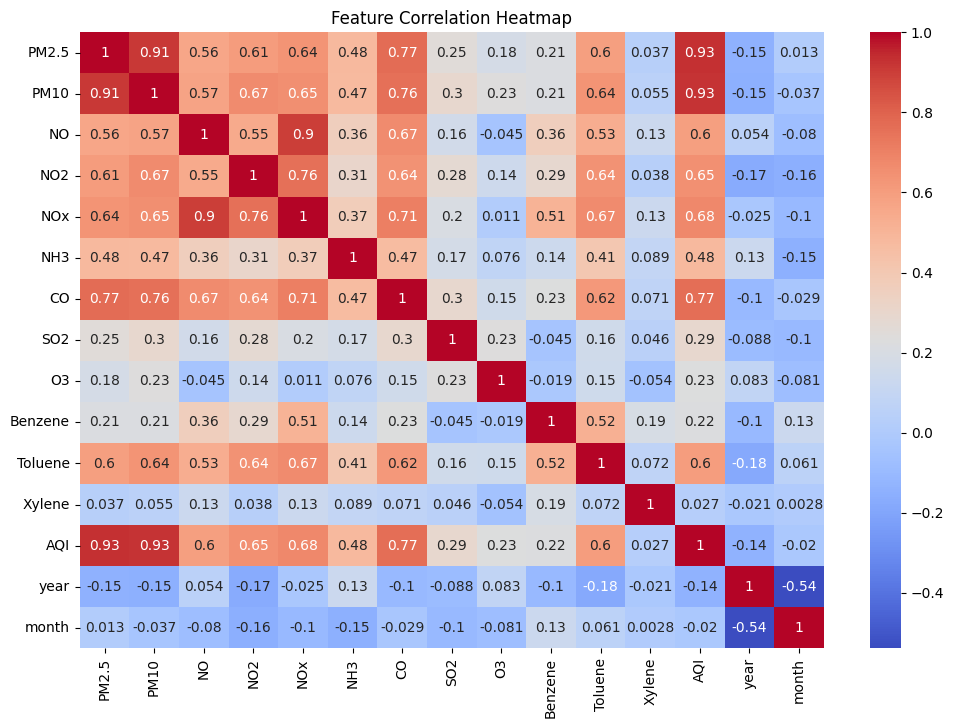


✅ Model Evaluation:
R² Score: 0.868
RMSE: 18.169


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from difflib import get_close_matches

# Step 1: Load dataset
df = pd.read_csv('city_day 1.csv')
print("📋 Columns in dataset:")
print(df.columns.tolist())

# Step 2: Identify actual PM2.5 column
possible_targets = get_close_matches('pm2_5', df.columns, n=3, cutoff=0.3)
if not possible_targets:
    raise ValueError("Couldn't find a column similar to 'pm2_5'. Please check column names.")
target_col = possible_targets[0]
print(f"🎯 Using '{target_col}' as target variable.")

# Step 3: Drop unusable or irrelevant columns
df.drop(columns=['id', 'location'], inplace=True, errors='ignore')

# Step 4: Drop missing values
df.dropna(inplace=True)

# Step 5: Detect and process date column
possible_date_cols = [col for col in df.columns if 'date' in col.lower()]
if possible_date_cols:
    date_col = possible_date_cols[0]
    df[date_col] = pd.to_datetime(df[date_col])
    df['year'] = df[date_col].dt.year
    df['month'] = df[date_col].dt.month
    df.drop(columns=[date_col], inplace=True)

# Step 6: Encode categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(f"🔤 Encoding categorical columns: {cat_cols}")
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Step 7: Visualize numeric correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 8: Prepare features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Step 9: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 11: Predict and evaluate
y_pred = model.predict(X_test)

print("\n✅ Model Evaluation:")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")


